In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
# Dane:https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# "Ten baseline variables, age, sex, body mass index, average blood pressure, 
# and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."
# diabetes = datasets.load_diabetes()
# data = diabetes.data # nalezy je przekształcić do pandasowego dataframe'u
data = pd.read_csv('diabetes.csv')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
## Atrybuty + Zmienna modelowana
data.columns.tolist()

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

In [4]:
data.shape

(442, 11)

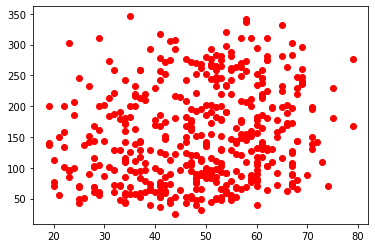

In [5]:
plt.scatter(data.AGE, data.Y,  color='red')

In [6]:
np.corrcoef(data.AGE, data.Y) #numpy

array([[1.        , 0.18788875],
       [0.18788875, 1.        ]])

In [7]:
data.AGE.corr(data.Y) # pandas

0.18788875071891978

In [8]:
corr = data.corr()
corr

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<AxesSubplot:>

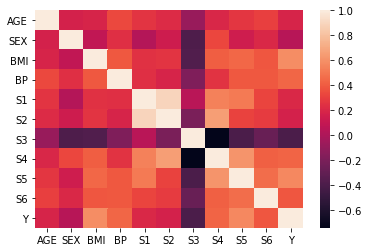

In [9]:
import seaborn as sns
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

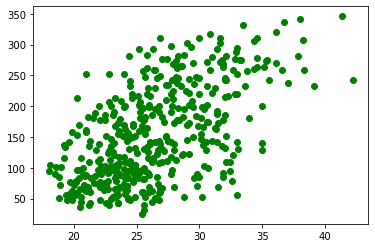

In [10]:
plt.scatter(data.BMI, data.Y,  color='green')

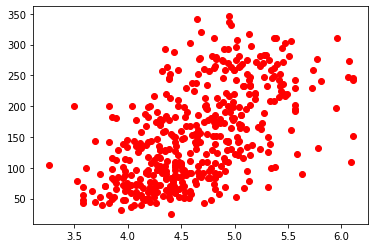

In [11]:
plt.scatter(data.S5, data.Y,  color='red')

In [12]:
data.isnull().values.any()

False

In [13]:
dataset = data.iloc[:,:-1] # wyodrebniamy zmienne objaśniające bez targetu
dataset

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [14]:
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BMI']], data.Y, test_size=0.2, random_state=0)

In [15]:
# 1. Tworzymy obiekt modelu
model = LinearRegression()
# 2. Trenujemy model na danych treningowych
model.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model.score(X_test, y_test)

0.1905734684756012

In [16]:
model.coef_ # Podejrzyjmy współczynniki modelu

array([10.58040081])

In [17]:
# Wizualizacja współczynników zmiennych w przypadku więcej niż jednej zmiennej objaśniającej
# coeff = list(model.coef_)
# labels = list(X_train.columns)
# features = pd.DataFrame()
# features['Features'] = labels
# features['importance'] = coeff
# features.sort_values(by=['importance'], ascending=True, inplace=True)
# features['positive'] = features['importance'] > 0
# features.set_index('Features', inplace=True)
# features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
# plt.xlabel('Importance')

In [18]:
model.intercept_ # Punkt przecięcia prostej z osią Y

-126.77820035769687

In [19]:
predykcje = model.predict(X_test)

In [20]:
predykcje

array([255.17426905, 211.79462571, 161.0087018 , 129.26749936,
       196.98206457, 247.76798848, 123.97729895, 174.76322286,
       205.44638522, 198.04010465,  95.41021675, 198.04010465,
       115.5129783 , 107.04865765, 239.30366783, 130.32553944,
        94.35217667, 101.75845724,  70.01725479, 191.69186416,
       180.05342327, 163.12478196, 128.20945928, 209.67854555,
       206.5044253 , 169.47302245, 111.28081797, 108.10669773,
       156.77654147, 177.9373431 , 149.3702609 , 100.70041716,
       141.96398033, 140.90594025, 146.19614066, 172.6471427 ,
       136.67377993, 143.02202042, 153.60242123, 185.34362367,
        88.00393618, 141.96398033, 145.13810058, 148.31222082,
       182.16950343,  92.23609651, 133.49965968, 176.87930302,
       119.74513862, 185.34362367, 130.32553944, 105.99061756,
       170.53106253, 144.0800605 , 194.86598441, 134.55769976,
       182.16950343, 148.31222082, 147.25418074, 164.18282204,
       192.74990424, 175.82126294, 201.2142249 , 131.38

In [21]:
# Mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

Mean squared error: 4150.68


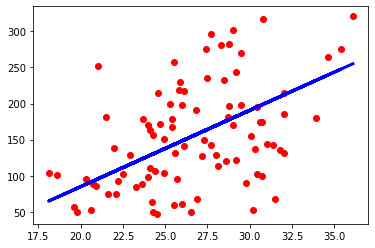

In [22]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, predykcje, color='blue', linewidth=3)
plt.show()

In [23]:
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BMI', 'S5', 'S4']], data.Y, test_size=0.2, random_state=0)

In [24]:
# 1. Tworzymy obiekt modelu
model1 = LinearRegression()
# 2. Trenujemy model na danych treningowych
model1.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model1.score(X_test, y_test)

0.2855703139021728

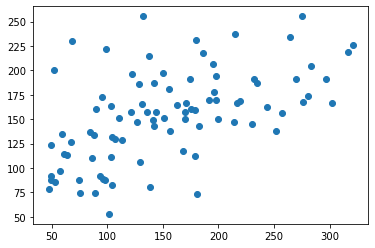

In [25]:
predykcje = model1.predict(X_test)
plt.scatter(y_test, predykcje)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, data.Y, test_size=0.2, random_state=0)

In [27]:
# 1. Tworzymy obiekt modelu
model2 = LinearRegression()
# 2. Trenujemy model na danych treningowych
model2.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model2.score(X_test, y_test)

0.33223321731061795

Text(0.5, 0, 'Importance')

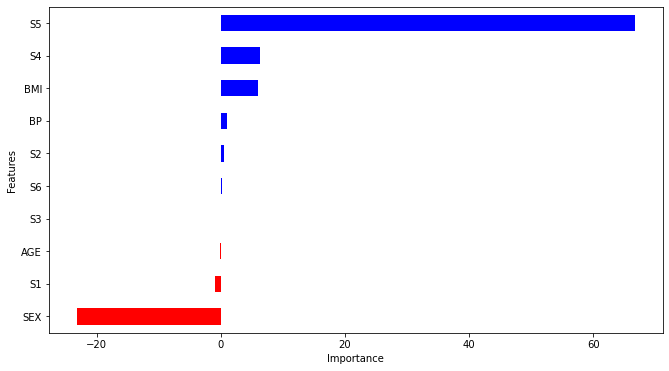

In [28]:
# Wizualizacja współczynników zmiennych w przypadku więcej niż jednej zmiennej objaśniającej
coeff = list(model2.coef_)
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## Zadania

1. Zbuduj model używając tylko jednej zmiennej dla pozostałych atrybutów i wybierz ten, który uzyskuje najlepsze wyniki pomiaru jakości regresji. Następnie porównaj najlepiej działający model z regresją wyuczoną na wszystkich zmiennych objaśniających.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [30]:
data.BP.corr(data.Y)
# współczynnik korelacji niski - słaba zależność między cechą BP blood preassure a progresją choroby po roku od badania Y

0.44148175856257116

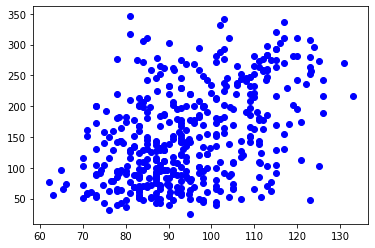

In [31]:
plt.scatter(data.BP, data.Y,  color='blue')

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data [['BP']],data.Y, test_size=0.3, random_state=0)

In [33]:
#Wyliczamy współczynnik determinacji, który określi dopasowanie modelu.
modelBP = LinearRegression()
modelBP.fit(X_train, y_train)
modelBP.score(X_test, y_test)
# wynik dopasowania modelu z jedną zmienną BP bardzo słaby

0.14413128560500243

In [34]:
# Współczynnik modelu / kierunkowy prostej 
## - mówi o tym czy wraz ze wzrostem zmiennej x rośnie zmienna y (współczynnik >0) 
### lub wraz ze wzrostem zmiennej x zmienna y maleje (współczynnik <0)
modelBP.coef_

array([2.63259906])

In [35]:
# punkt przecięcia prostej z osią Y
modelBP.intercept_

-96.96323590936947

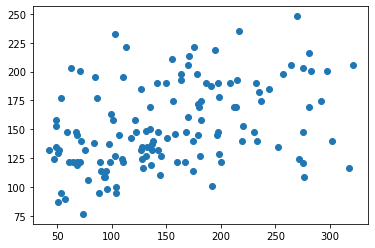

In [36]:
predykcje = modelBP.predict(X_test)
plt.scatter(y_test, predykcje)

In [37]:
predykcje

array([205.7856564 , 192.62266108, 184.72486389, 121.54248637,
       221.58125078, 147.868477  , 145.23587794, 189.99006202,
       132.07288262, 163.66407138, 134.70548168, 139.97067981,
       116.27728824,  76.78830229, 205.7856564 , 153.13367513,
       176.8270667 , 132.07288262, 158.39887326, 211.05085453,
       205.7856564 , 108.37949105, 195.25526014, 118.9098873 ,
       121.54248637, 134.70548168, 232.11164703, 108.37949105,
       187.35746295, 145.23587794, 234.7442461 , 126.80768449,
       147.868477  , 121.54248637, 139.97067981, 168.92926951,
       142.60327887, 197.88785921, 158.39887326, 177.69582439,
        98.71785248, 171.56186857, 113.64468917, 128.57152587,
       184.72486389, 121.54248637, 168.92926951, 158.39887326,
       138.20683844, 247.90724142, 174.19446764, 139.97067981,
       221.58125078, 126.80768449, 218.94865172, 213.68345359,
       147.868477  , 121.54248637, 147.868477  , 182.09226483,
       132.07288262, 158.39887326, 110.14333242, 145.23

In [38]:
# błąd MSE
print("Mean squared error: %.2f"
      % np.mean((modelBP.predict(X_test) - y_test) ** 2))

Mean squared error: 4366.21


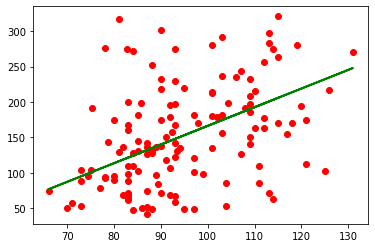

In [39]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, predykcje,color='green', linewidth=2)
plt.show()

In [40]:
# SPRAWDZENIE KOLEJNEJ ZMIENNEJ: S1

In [41]:
data.S1.corr(data.Y)

0.21202248101455073

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data [['S1']],data.Y, test_size=0.3, random_state=0)

In [43]:
#Wyliczamy współczynnik determinacji, który określi dopasowanie modelu.
# Wynik dopasowania bardzo słaby.
modelS1 = LinearRegression()
modelS1.fit(X_train, y_train)
modelS1.score(X_test, y_test)

0.002614434176738123

In [44]:
modelS1.coef_

array([0.55416228])

In [45]:
modelS1.intercept_

47.38307081246633

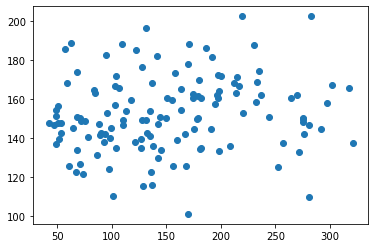

In [46]:
predykcjeS1 = modelS1.predict(X_test)
plt.scatter(y_test, predykcjeS1)

In [47]:
print("Mean squared error: %.2f"
      % np.mean((modelS1.predict(X_test) - y_test) ** 2))

Mean squared error: 5088.15


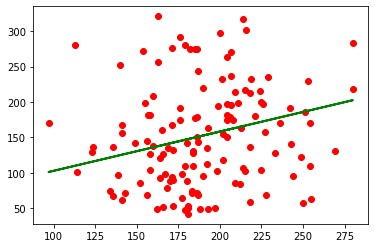

In [48]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, predykcjeS1,color='green', linewidth=2)
plt.show()

In [49]:
# SPRAWDZENIE ZMIENNEJ S4

In [50]:
data.S4.corr(data.Y)

0.43045288474477295

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data [['S4']],data.Y, test_size=0.3, random_state=0)

In [52]:
modelS4 = LinearRegression()
modelS4.fit(X_train, y_train)
modelS4.score(X_test, y_test)

0.12960624218203198

In [53]:
modelS4.coef_

array([27.02379065])

In [54]:
modelS4.intercept_

41.903779414892895

array([149.998942  , 177.02273264, 149.998942  , 149.998942  ,
       122.97515135, 149.998942  , 122.97515135, 149.998942  ,
       122.97515135, 149.998942  , 149.998942  , 204.04652329,
       122.97515135, 122.97515135, 204.04652329, 122.97515135,
       122.97515135, 122.97515135,  95.95136071, 177.02273264,
       116.7596795 , 122.97515135, 149.998942  ,  95.95136071,
       204.04652329, 149.998942  ,  95.95136071,  95.95136071,
       122.97515135, 177.02273264, 149.998942  , 122.97515135,
       122.97515135, 177.02273264, 177.02273264, 149.998942  ,
       177.02273264, 204.04652329, 122.97515135, 158.3763171 ,
       146.75608712, 177.02273264, 149.998942  , 132.97395389,
       204.04652329, 122.97515135, 122.97515135, 122.97515135,
       166.48345429, 149.998942  , 149.998942  , 122.97515135,
       122.97515135, 177.02273264, 149.998942  , 231.07031393,
       204.04652329,  95.95136071, 177.02273264, 149.998942  ,
       154.05251059, 122.97515135, 190.53462796, 149.99

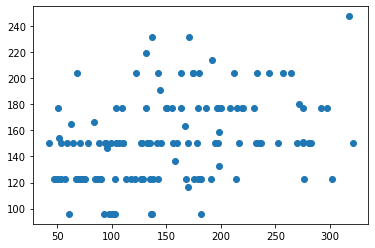

In [55]:
predykcjeS4 = modelS4.predict(X_test)
plt.scatter(y_test, predykcjeS4)
predykcjeS4

In [56]:
print("Mean squared error: %.2f"
      % np.mean((modelS4.predict(X_test) - y_test) ** 2))

Mean squared error: 4440.31


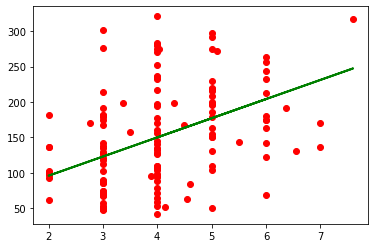

In [57]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, predykcjeS4,color='green', linewidth=2)
plt.show()

In [58]:
# SPRAWDZENIE WIELU ZMIENNYCH SEX, BMI, BP, S1, S5

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data [['SEX', 'BMI', 'BP','S1','S5']],data.Y, test_size=0.3, random_state=0)

In [60]:
model3 = LinearRegression()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.375972424102204

In [61]:
model3.coef_

array([-11.0112062 ,   7.02924097,   0.82509156,  -0.35754583,
        65.58567961])

In [62]:
model3.intercept_

-330.4419581724062

In [63]:
predykcje3=model3.predict(X_test)
predykcje3

array([244.97549722, 249.07581507, 161.90103761, 110.59022895,
       190.1216976 , 266.76070432, 116.83206849, 198.79770548,
       148.87497135, 242.80654999, 163.98653056, 173.52797544,
       113.6468499 ,  87.86357077, 238.18215685,  91.31888302,
       142.77278554,  71.97686647,  87.70651107, 197.77221091,
       193.87452451, 171.032179  , 166.3696024 , 168.53358143,
       204.38870206, 175.86658407, 138.09128911,  94.09647091,
       198.14182618, 163.07169628, 182.65841209,  78.91995093,
       137.18996958, 133.88744811, 141.79141755, 190.79933934,
       150.25471975, 173.24368123, 127.57728574, 203.40186848,
        76.92309801, 155.82154274, 153.63197798, 186.92815858,
       161.60963961,  75.76052599, 157.26535391, 142.16490437,
       120.99074274, 223.61698683, 159.38541663,  78.37197488,
       150.07727926, 157.77625779, 234.96904871, 158.05711168,
       179.68945642, 126.80134621, 124.85401387, 183.64335418,
       211.8838763 , 173.87857834, 140.80628111, 113.56

Text(0.5, 0, 'Importance')

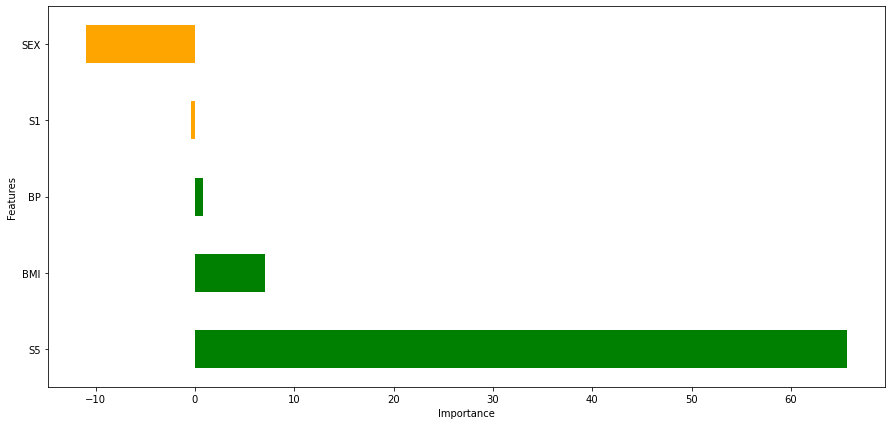

In [64]:
# Wizualizacja współczynników zmiennych w przypadku więcej niż jednej zmiennej objaśniającej
coeff = list(model3.coef_)
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending = False, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(15, 7),color = features.positive.map({True: 'green', False: 'orange'}))
plt.xlabel('Importance')

2. Korzystając z danych boston, przeprowadź analogiczną analizę - wybierz trzy najbardziej skorelowane zmienne objaśniające z targetem, a następnie zbuduj na nich model regresji liniowej. Sprawdź wyniki pomiaru błędu predykcji

In [65]:
data = datasets.load_boston()

In [66]:
# Zmienne objaśniające 
df = pd.DataFrame(data.data, columns=data.feature_names)

# Zmienna objaśniana
target = pd.DataFrame(data.target, columns=["MEDV"])

In [67]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [68]:
target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [69]:
brakujace_dane = df.isnull().sum().sort_values()
brakujace_dane.tail(10)

CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [79]:
df.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [71]:
df.shape

(506, 13)

In [80]:
target.columns.tolist()

['MEDV']

In [81]:
target.shape

(506, 1)

In [198]:
# BADANIE KORELACJI

# W tym miejscu mam kilka pytań:
# Tabela ma 13 kolumn, kolumna MEDV jest czternasta. 
# Przy pierwsze próbie zastosowania polecenia corr brakowało własnie kolumny z danymi określanymi.
# Próbowałam ją wstawić do tabeli poleceniem
# df1 = df.insert(13,"MEDV",target)
# ale wyskakiwała informacja, że ta kolumna już istnieje w tabeli.
# A chwilę pózniej zadziałało już polecenie corr i w tabeli pojawia się 14ta kolumna.
# Cel osiągnięty, ale to się stało jakoś poza mną... :( NIE ROZUMIEM TEGO...

# Drugi temat, który mnie gnębi: zmienna NOX nie jest najbardzoej skorelowana z MEDV, dlatego jej nie wybrałam do analizy.
## A w podsumowaniu, po stworzyeniu modelu ze wszytskimi zmiennymi, okazuje się, że ma ona największe znaczenie...? 
# Powinnam doczytać i to zrobię, ale tego materiału jest tak dużo, że aby być w miarę na bieżąco na zajęciach muszę pędzić do przodu.
# Pozdrawiam!

In [87]:
corr=df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [197]:
corr.shape

(14, 14)

In [88]:
df.isnull().values.any()

False

<AxesSubplot:>

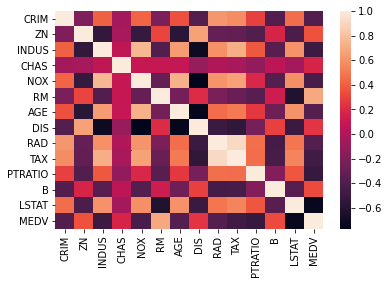

In [89]:
import seaborn as sns
sns.heatmap (corr,xticklabels=corr.columns, yticklabels=corr.columns )

In [90]:
df.LSTAT.corr(df.MEDV)

-0.737662726174015

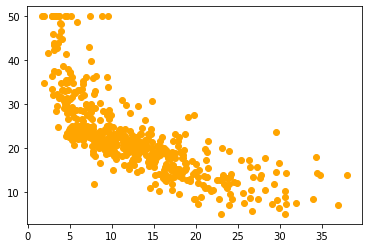

In [91]:
plt.scatter(df.LSTAT, df.MEDV, color = 'orange')

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['LSTAT']],df.MEDV, test_size = 0.3, random_state=0)

In [93]:
# Tworzymy model i speawdzamy jego dopasowanie

In [94]:
model=LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5218049526125568

In [95]:
# model dopasowany dość dobrze

In [96]:
# Szukamy współczynników modelu

In [97]:
model.coef_

array([-0.96814078])

In [98]:
model.intercept_

34.78978059060413

In [99]:
# Przez model przepuszczamy dane testowe

In [100]:
predykcja=model.predict(X_test)
predykcja

array([27.68362724, 25.56339892, 24.62430236, 15.6496373 , 22.84292332,
       26.58962815, 23.70456862, 25.79575271, 22.55248109, 24.49844406,
       14.82671764, 14.24583316, 17.56655605,  7.41075923, 32.93095029,
       30.20079328, 24.39194858, 30.83976619, 29.62959021, 26.29918592,
       27.81916695, 23.14304697, 21.14867695, 27.82884836, 24.90506319,
       21.88446395, 21.40039355, 19.50283762, 30.71390789, 18.2442546 ,
       17.33420226, 20.55811107, 24.96315164, 22.78483488, 26.03778791,
       20.61619952,  8.87265182, 26.19269043, 17.71177717, 11.45758771,
       26.48313267, 21.0905885 , 25.98938087, 17.22770678, 26.41536281,
       25.94097383, 19.45443058, 20.15149194,  6.43293704, 25.66989441,
       20.24830602, 17.7505028 , 23.51094046, 31.36256222, 18.03126363,
       19.58028888, 22.75579065, 22.52343686, 25.00187727, 18.06998926,
       27.24796389, 22.46534842, 30.08461638, 31.14957124, 20.50002263,
       30.37505862, 17.6246445 , 14.99130157, 15.63995589, 24.26

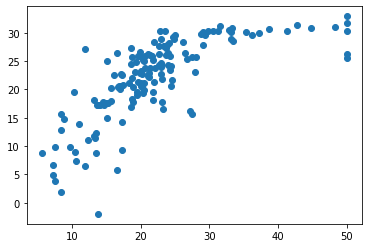

In [101]:
plt.scatter(y_test, predykcja)

In [102]:
# sprawdzamy wielkość błędu MSE
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

Mean squared error: 39.82


<function matplotlib.pyplot.show(close=None, block=None)>

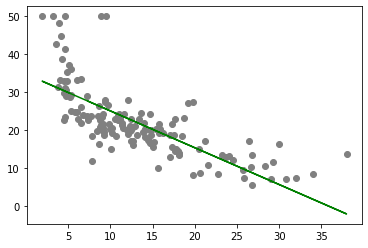

In [103]:
plt.scatter (X_test, y_test, color = 'grey')
plt.plot (X_test, predykcja, color ='green')
plt.show

In [104]:
# Zmienna LSTAT zdecydowanie koreluje ze zmienną objaśnianą MEDV. Możemy wyznaczyć trend.

In [105]:
## ANALIZA KOLEJNEJ ZMIENNEJ SKORELOWANEJ PTRATIO

In [106]:
df.PTRATIO.corr(df.MEDV)

-0.5077866855375622

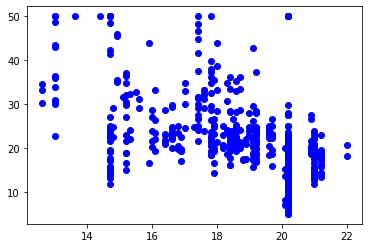

In [107]:
plt.scatter(df.PTRATIO, df.MEDV, color = 'blue')

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['PTRATIO']],df.MEDV, test_size = 0.3, random_state=0)

In [109]:
model1=LinearRegression()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.10105376152311318

In [110]:
# model bardzo słabo dopasowany - nie badam dalej

In [111]:
## ANALIZA ZMIENNEJ RM

In [112]:
df.RM.corr(df.MEDV)

0.6953599470715393

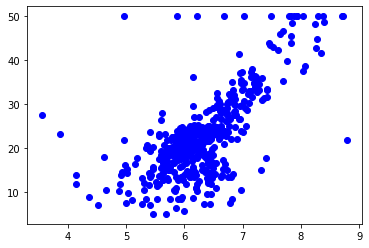

In [113]:
plt.scatter(df.RM, df.MEDV, color = 'blue')

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['RM']],df.MEDV, test_size = 0.3, random_state=0)

In [115]:
model2=LinearRegression()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.4351436483211518

In [116]:
# Model 2 dopasowany dużo lepiej niż model 1.

In [117]:
# Współczynniki prostej

In [118]:
model2.coef_

array([9.31132806])

In [119]:
model2.intercept_

-35.994348978183524

In [120]:
# Przez model2 przepuszczamy dane testowe
predykcja2=model2.predict(X_test)
predykcja2

array([ 2.29742916e+01,  2.18848663e+01,  2.33467448e+01,  1.38119448e+01,
        2.20338475e+01,  1.83279389e+01,  1.89890432e+01,  1.95756569e+01,
        1.03108855e+01,  2.36447073e+01,  1.94732323e+01,  2.59911619e+01,
        2.30487823e+01,  7.32194917e+00,  3.66526326e+01,  2.95667119e+01,
        2.21269608e+01,  3.18572986e+01,  2.49576045e+01,  1.84769202e+01,
        2.38402452e+01,  1.87562600e+01,  2.10561581e+01,  2.43616795e+01,
        1.69126171e+01, -2.46886698e-02,  1.95477229e+01,  1.71640229e+01,
        3.91387572e+01,  2.07302616e+01,  2.15962151e+01,  2.06278370e+01,
        2.19779795e+01,  2.07581956e+01,  2.37471319e+01,  1.80392878e+01,
        1.97525721e+01,  1.87097034e+01,  2.31139616e+01,  2.13820545e+01,
        2.10561581e+01,  1.78809952e+01,  2.12144506e+01,  1.45382284e+01,
        2.49017366e+01,  2.37936885e+01,  1.79182405e+01,  2.10747807e+01,
        9.65909252e+00,  2.66429549e+01,  2.12889413e+01,  1.68008811e+01,
        1.96967042e+01,  

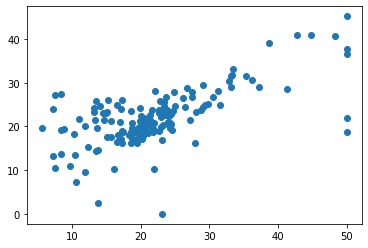

In [121]:
plt.scatter(y_test, predykcja2)

In [122]:
# Błąd MSE

In [123]:
print("Mean squared error: %.2f"
      % np.mean((model2.predict(X_test) - y_test) ** 2))

Mean squared error: 47.03


In [124]:
# wynik błędu wyższy niż przy modelu ze zmienną LSTAT

<function matplotlib.pyplot.show(close=None, block=None)>

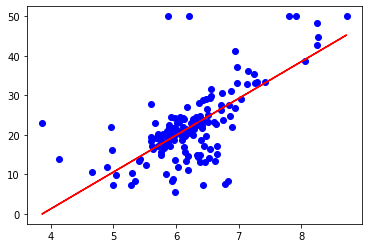

In [125]:
plt.scatter (X_test, y_test, color = 'blue')
plt.plot (X_test, predykcja2, color ='red')
plt.show

In [126]:
# ANALIZA ZMIENNEJ INDUS

In [127]:
df.INDUS.corr(df.MEDV)

-0.4837251600283728

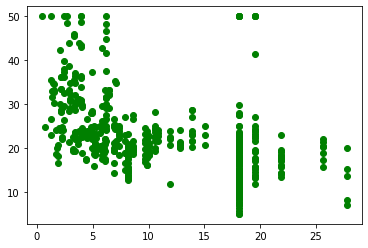

In [128]:
plt.scatter(df.INDUS, df.MEDV, color = 'green')

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['INDUS']],df.MEDV, test_size = 0.3, random_state=0)

In [130]:
model3=LinearRegression()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.18070553529000033

In [131]:
model3.coef_

array([-0.66488754])

In [132]:
model3.intercept_

30.111607713800204

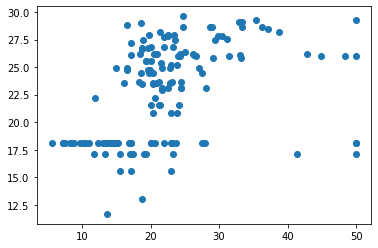

In [133]:
predykcja3=model3.predict(X_test)
plt.scatter(y_test, predykcja3)

In [134]:
print("Mean squared error: %.2f"
      % np.mean((model3.predict(X_test) - y_test) ** 2))

Mean squared error: 68.22


<function matplotlib.pyplot.show(close=None, block=None)>

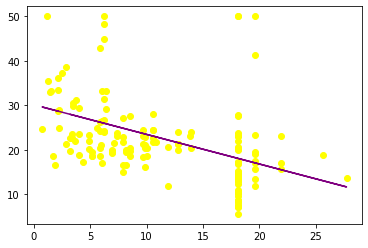

In [135]:
plt.scatter (X_test, y_test, color = 'yellow')
plt.plot (X_test, predykcja3, color ='purple')
plt.show

In [175]:
## ANALIZA WIELU ZMIENNYCH

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['RM','LSTAT']],df.MEDV, test_size = 0.3, random_state=0)

In [177]:
model4=LinearRegression()
model4.fit(X_train, y_train)
model4.score(X_test, y_test)

0.6069792285352372

In [178]:
# dobre dopasowanie modelu

In [179]:
model4.coef_

array([ 5.27350522, -0.6418309 ])

In [180]:
model4.intercept_

-2.5372467189439583

In [181]:
print("Mean squared error: %.2f"
      % np.mean((model4.predict(X_test) - y_test) ** 2))

Mean squared error: 32.73


In [182]:
# Wizualizacja

Text(0.5, 0, 'importance')

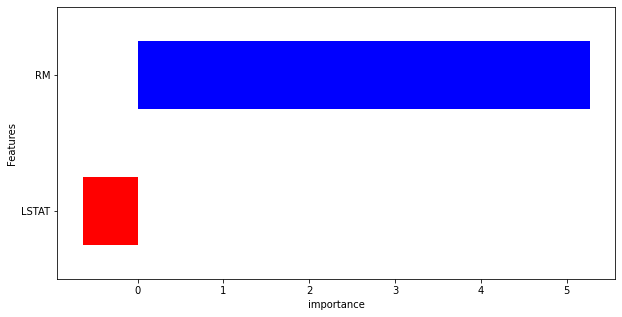

In [183]:
coeff=list(model4.coef_)
labels=list(X_train.columns)
features=pd.DataFrame()
features['Features']=labels
features['importance']=coeff
features.sort_values(by = ['importance'],ascending=True, inplace=True)
features['positive']=features['importance']>0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(10,5), color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel ('importance')

In [184]:
#Sprawdzenie wpływu wszystkich zmiennych na target

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
 'LSTAT']],df.MEDV, test_size = 0.3, random_state=0)

In [186]:
model5=LinearRegression()
model5.fit(X_train, y_train)
model5.score(X_test, y_test)

0.673382550640017

In [187]:
model5.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [188]:
model5.intercept_

37.9371077418332

In [189]:
print("Mean squared error: %.2f"
      % np.mean((model5.predict(X_test) - y_test) ** 2))

Mean squared error: 27.20


Text(0.5, 0, 'importance')

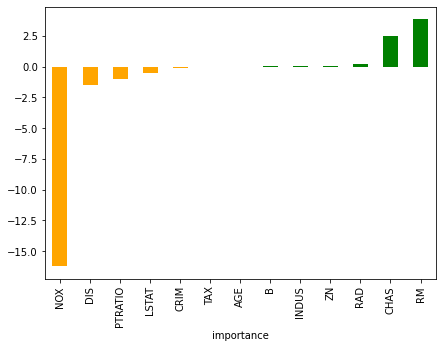

In [196]:
coeff=list(model5.coef_)
labels=list(X_train.columns)
features=pd.DataFrame()
features['Features']=labels
features['importance']=coeff
features.sort_values(by = ['importance'],ascending=True, inplace=True)
features['positive']=features['importance']>0
features.set_index('Features', inplace=True)
features.importance.plot(kind='bar', figsize=(7,5), color = features.positive.map({True: 'green', False: 'orange'}))
plt.xlabel ('importance')